This notebook is an example of how the 'extract_SOI_info.py' functions can be used. From extracting relevant information from a dive (length, resolutions available, etc) to downloading an frame from the SOI video.

In [7]:
import sys
sys.path.insert(0, '../pipeline')

import extract_SOI_info as soi
import youtube_utils as yt
import database

#Import JSON file
SOI_dir = soi.SOI_json("../pipeline/tsindex.json")

db = database.Database()
dives_yt_df = db.read_into_df(
    """
    SELECT *
    FROM subastian_dive_livestreams_youtube
    """)

In [8]:
#Get length in seconds of a dive: both for SOI and YouTube
dive_id = 'SB0312'
print('Length of SOI vid:', SOI_dir.vid_minmax(dive_id)['length'])

yt_url = soi.yt_url(dive_id, dives_yt_df)
if yt_url is not None:
    yt_info = yt.youtube_info(yt_url)
    print('Length of YouTube vid:', yt_info.youtube_sec_fps()['length'])

Length of SOI vid: 35640
[youtube] 8rw6fLnMW4o: Downloading webpage
Length of YouTube vid: 15998


In [9]:
#Find seconds when SOI data is not available
frames_NA = SOI_dir.find_disc(dive_id = dive_id)
print(len(frames_NA))
print(frames_NA[0:5])

4198
[1580171716, 1580171717, 1580171718, 1580171719, 1580171720]


In [10]:
#Resolutions available
yt_info.youtube_res_avail()

['144p',
 '144p',
 '240p',
 '240p',
 '360p',
 '360p',
 '480p',
 '480p',
 '720p',
 '720p',
 '360p',
 '720p']

In [11]:
output_path = '../images/'

print(SOI_dir.vid_minmax(dive_id))

{'min_sec': 1580171711, 'max_sec': 1580207350, 'length': 35640}


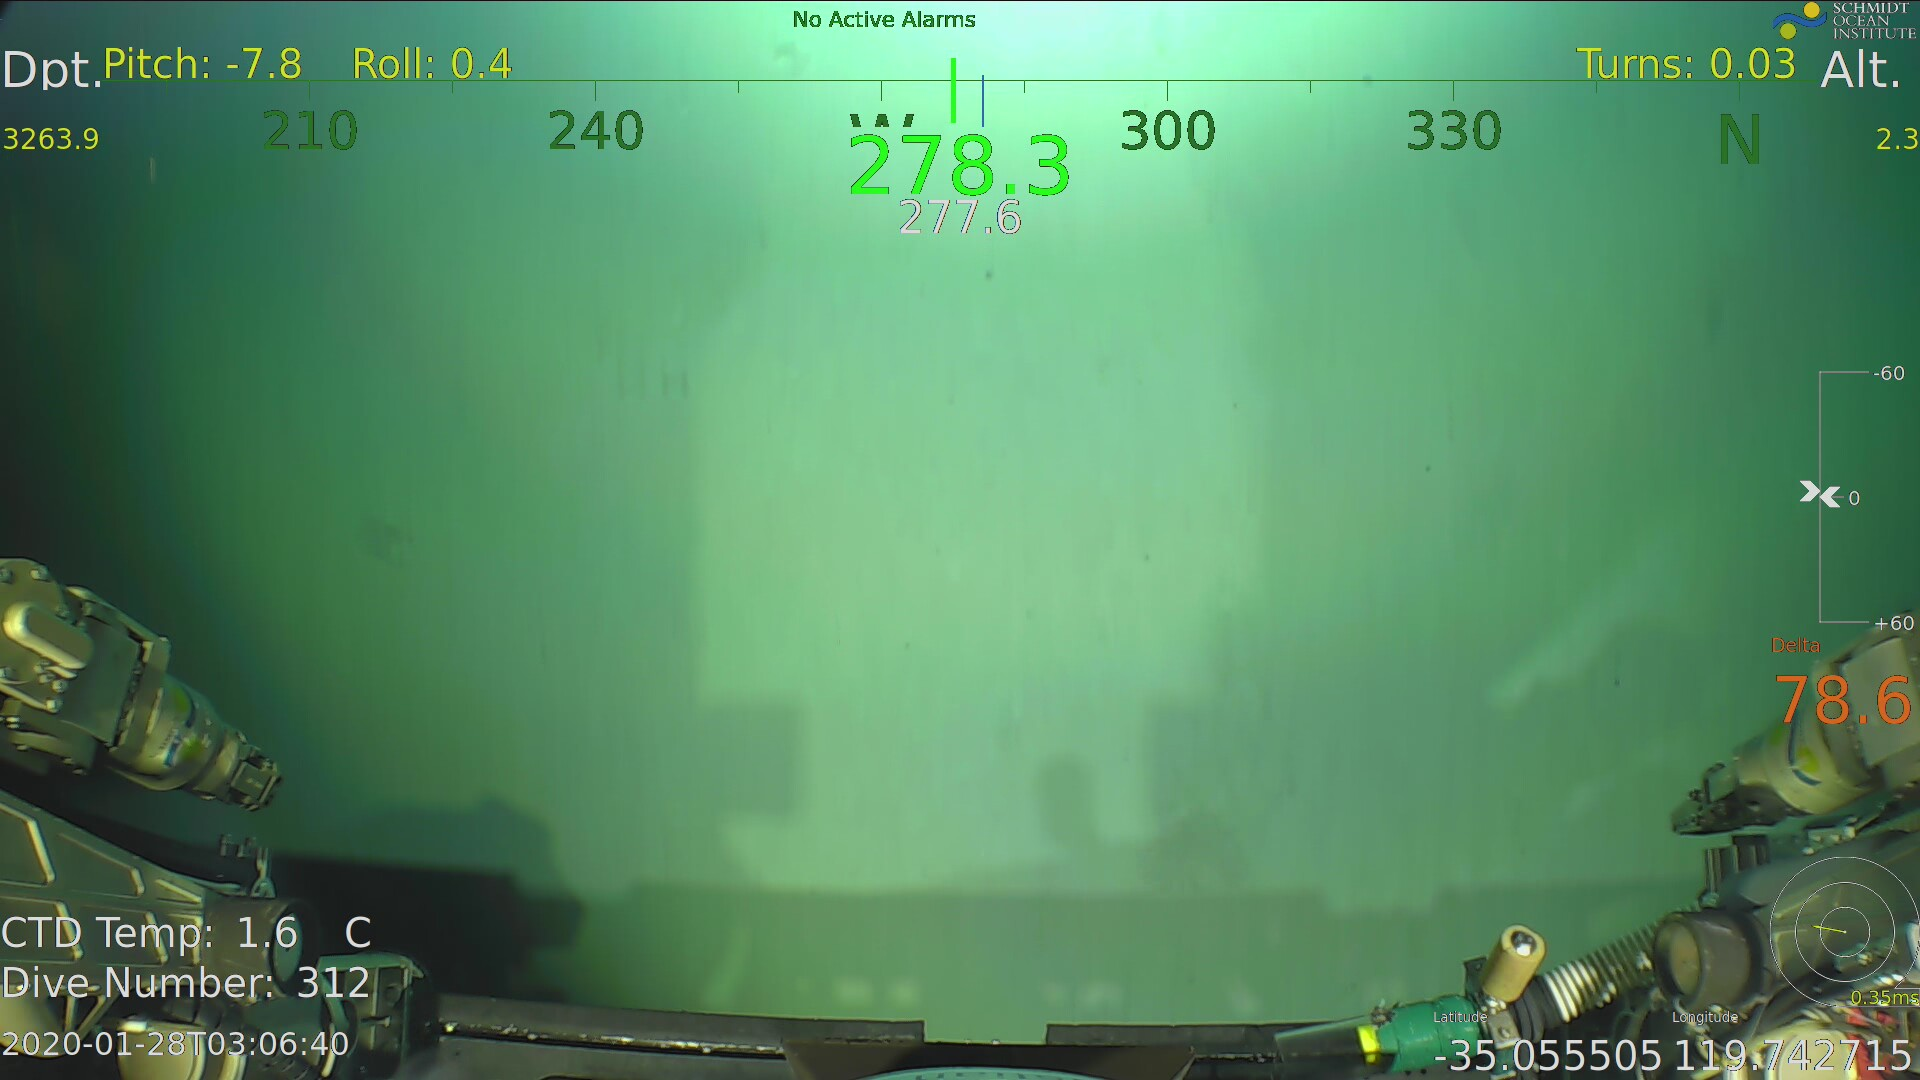

In [38]:
frame = 1580180800
SOI_dir.save_img(frame = frame, dive_id = dive_id, output_path = output_path, resolution="HD_SIT")

from IPython.display import Image
Image(filename=f"{output_path}{dive_id}_{frame}.jpeg") 

In [35]:
resolution="4K_SCI"
format="JPEG1080"
f"https://streamcache.uc.r.appspot.com/SOI2020/FK200126/{dive_id}/{resolution}/SOURCE/{format}/{frame}"

'https://streamcache.uc.r.appspot.com/SOI2020/FK200126/SB0312/4K_SCI/SOURCE/JPEG1080/1580205521'